In [18]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.0 MB/s  0:00:00 eta 0:00:01


In [66]:
import pandas as pd
import os

## Loading all the data

In [67]:
def read_xml_files(folder_path):
    """Read all XML files in a folder and return a concatenated DataFrame."""
    # List all XML files in the folder
    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
    
    # Read each XML file and append to a list
    df_list = []
    for xml_file in xml_files:
        file_path = os.path.join(folder_path, xml_file)
        df = pd.read_xml(file_path)
        df_list.append(df)

    print(len(df_list), "XML files read.")
    
    # Concatenate all DataFrames in the list
    concatenated_df = pd.concat(df_list, ignore_index=True)
    
    return concatenated_df

In [68]:
print(os.getcwd())

/Users/s2087805/Downloads/nls-trial-catalogue-published-material


In [69]:
data = read_xml_files('../nls-catalogue-published-material/nls-catalogue-published-material_dc')


51 XML files read.


In [70]:
data

,title,creator,type,publisher,date,language,subject,description,rights,identifier,relation,coverage,format
0,Anglo-russkii slovar' po mikroelektronike : ok...,"Prokhorov, K. IA.(Konstantin IAkovlevich)",text,Moskva Russkii iazyk,1985,rus,Microelectronics,None,None,None,None,None,None
1,Local government finance in Scotland: rate sup...,Great Britain.Scottish Office.,text,[Edinburgh] Scottish Office,1985,eng,Local finance,None,None,None,None,None,None
2,The correlation of monthly rainfall with posit...,Commonwealth Scientific and Industrial Researc...,text,Melbourne : Commonwealth Scientific and Indust...,1958.,eng,Rainfall anomalies,In a folder with thirteen folded maps.,None,None,None,None,None
3,Catalogue,Peter Deloford (Bookseller),text,London P. Deloford,[1974]-,eng,Antiquarian booksellers,None,None,None,None,None,None
4,Control of pests and diseases of grass and for...,None,text,"Alnwick MAFF, ADAS",1985,eng,Grasses,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091422,Textbook of fish culture breeding and cultivat...,"Kahn, Henry.",text,London Fishing News,[1973],eng,Fish-culture.,Bibliographyp.425-436,None,None,None,None,None
5091423,Tax planning a service or crime?,"Carmichael, K. S.(Keith Stanley).",text,London Institute of Chartered Accountants in E...,[1969],eng,Tax accounting,None,None,None,None,None,None
5091424,Tables for use in high resolution mass spectro...,"Cleaver, R. L.",text,London Heyden,1970,eng,Mass spectrometry,Notebook format. [28]p. booklet in pocket. Pag...,None,None,None,None,None
5091425,A systems approach to community college education,"Barbee, David E.",text,Princeton [Croydon] Auerbach,1972,eng,Municipal junior colleges,Bibliographyp.161-174. - Includes index,None,None,None,None,None


## Somne data descriptions

In [71]:
data.language.describe()

count     5091057
unique        367
top           eng
freq      4171764
Name: language, dtype: object

In [72]:
data.language.unique() 

array(['rus', 'eng', 'und', 'lat', 'iri', '   ', 'pol', 'wel', 'fre',
       'ger', 'zxx', 'ita', 'spa', 'hrv', 'per', 'swe', 'ewo', 'ara',
       'gla', 'dut', 'slo', 'sco', 'gre', 'nor', 'mul', 'alb', 'dan',
       'scc', 'bul', 'mis', 'cor', 'por', 'chi', 'lit', 'jpn', 'grc',
       'heb', 'rum', 'bre', 'gle', 'epo', 'hun', 'cat', 'slv', 'enm',
       'tur', 'ice', 'ang', 'guj', 'ben', 'kor', 'd  ', 'snh', 'baq',
       'kon', 'tog', 'nic', 'ful', 'fao', 'fri', 'cze', 'frm', 'may',
       'swa', 'ukr', 'asm', '|||', 'nya', 'kan', 'syr', 'fin', 'arm',
       'esp', 'twi', 'vie', 'gaa', 'ind', 'oji', 'kur', None, 'srp',
       'yor', 'afr', 'tha', 'mon', 'fro', 'mao', 'men', 'zul', 'bem',
       'mac', 'inc', 'est', 'yao', 'urd', 'mal', 'kin', 'cam', 'gal',
       'btk', 'esk', 'ton', 'ada', 'pan', 'art', 'max', 'int', 'pli',
       'aze', 'hin', 'glg', 'lan', 'som', 'map', 'roa', 'eth', 'mlt',
       'pro', 'lug', 'tam', 'bel', 'smi', 'tib', 'fat', 'ijo', 'sho',
       '|d', 'lav', '

## Where all the cleaning happens! 
Here we also long information on what we normalize and how messy the data is 

### Helper functions

In [80]:
import json
import numpy as np

# Loading dict to map language codes to full language names
with open('../nls-catalogue-published-material/language_codes.json', 'r') as f:
    lang_code_map = json.load(f)

In [81]:
print(lang_code_map.get('eng'))  # Example to check if loading was successful

English


In [ ]:
import numpy as np
import pandas as pd
import re
from collections import Counter
import unicodedata

def get_unique_and_missing_values(df, df_clean, normalization_log, col):
    col_data = df[col].copy()  # Original data for comparison
    normalization_log[col] = []
        # Step 1: Handle ONLY truly null representations - be conservative!
    null_values = ['NA', 'N/A', 'null', 'Null', 'NULL', 'nan', 'NaN', 'None']
    df_clean[col] = df_clean[col].replace(null_values, np.nan)
        # Only replace empty strings and single spaces in non-language columns
    if 'language' not in col.lower():
        df_clean[col] = df_clean[col].replace(['', '  '], np.nan)
        df_clean[col] = df_clean[col].replace(r'^\s*$', np.nan, regex=True)
    else:
            # For language column, only treat empty string as null
        df_clean[col] = df_clean[col].replace(['', '   '], np.nan)
    missing_count = df_clean[col].isna().sum()
    unique_count = df_clean[col].nunique(dropna=True)
    return col_data,missing_count,unique_count

def has_garbage_chars(text):
    for char in text:
        # Check for control characters (except common whitespace)
        if unicodedata.category(char) in ['Cc', 'Cf', 'Cs', 'Co', 'Cn']:
            if char not in ['\t', '\n', '\r']:
                return True
        # Check for replacement character (indicates encoding issues)
        if char == '\ufffd':
            return True
    return False

def print_everything(df_clean, normalization_log, col, missing_count, unique_count, messy, mixed_types, high_cardinality, single_value, value_counts):
    print(f"Column: {col}")
    print(f"  Unique values: {unique_count}")
    print(f"  Missing values: {missing_count}, {missing_count / len(df_clean):.2%}")
    print(f"  Messy data examples ({len(messy)}): {messy[:5]}{'...' if len(messy) > 5 else ''}")
    print(f"  Mixed types: {mixed_types}")
    print(f"  High cardinality: {high_cardinality}")
    print(f"  Single value: {single_value}")
    if normalization_log[col]:
        print(f"  Normalizations applied:")
        for norm in normalization_log[col]:
            print(f"    - {norm}")
    top_values = value_counts.head(10)
    print(f"  Top 10 value frequencies: {top_values.to_dict()}")
    bottom_values = value_counts.tail(10)
    print(f"  Bottom 10 value frequencies: {bottom_values.to_dict()}")
    print("-" * 40)

def detect_suspicious_patterns(normalization_log, col, messy, non_null):
    garbage_chars = non_null[non_null.apply(has_garbage_chars)]
    if len(garbage_chars) > 0:
        examples = garbage_chars.unique().tolist()[:10]
        messy.extend(examples)
        normalization_log[col].append(f"Found {len(garbage_chars)} values with garbage/control characters")
            
            # Check for suspicious patterns (but not legitimate punctuation or diacritics)
            # Only flag things like excessive punctuation, weird symbols
    suspicious = non_null[non_null.str.contains(r'[#@$%^*+=<>{}\\|`~]|[!?]{3,}|\.{4,}', regex=True, na=False)]
    if len(suspicious) > 0:
        examples = suspicious.unique().tolist()[:10]
        messy.extend(examples)
        normalization_log[col].append(f"Found {len(suspicious)} values with suspicious patterns")

def clean_extra_spaces(df_clean, normalization_log, col, messy, non_null):
    multi_space = non_null[non_null.str.contains(r'\s{2,}', regex=True, na=False)]
    if len(multi_space) > 0:
        examples = multi_space.unique().tolist()[:10]
        messy.extend(examples)
        df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)
        normalization_log[col].append(f"Normalized multiple spaces in {len(multi_space)} values")

def normalize_case_variants(df_clean, normalization_log, col, unique_count, messy):
    if unique_count < 1000:
        case_variants = {}
        for val in df_clean[col].dropna().astype(str).unique():
            normalized = val.lower()
            if normalized not in case_variants:
                case_variants[normalized] = []
            case_variants[normalized].append(val)
        inconsistent_case = {k: v for k, v in case_variants.items() if len(v) > 1}
        if inconsistent_case:
            examples = list(inconsistent_case.values())[:5]
            messy.extend([f"{items}" for items in examples[:3]])
            normalization_log[col].append(f"Found {len(inconsistent_case)} values with inconsistent capitalization")

def trim_whitespace(df_clean, normalization_log, col, messy, needs_trim):
    if len(needs_trim) > 0:
        examples = needs_trim.unique().tolist()[:10]
        messy.extend(examples)
        df_clean[col] = df_clean[col].str.strip()
        normalization_log[col].append(f"Trimmed whitespace from {len(needs_trim)} values")

def normalize_date_format(df_clean, normalization_log, col, col_data, messy):
    non_null = col_data.dropna().astype(str)
    # Valid date patterns: 1234, 1234., 1234-, etc. (no brackets allowed)
    date_pattern = r'^\s*\d{4}[\.-]?\s*$'
    messy_mask = ~non_null.str.match(date_pattern, na=False) | non_null.str.contains(r'\[|\]', regex=True)
    messy.extend(non_null[messy_mask].unique().tolist())
    original_values = df_clean[col].copy()
    df_clean[col] = df_clean[col].astype(str).str.extract(r'(\d{4})', expand=False)
    # remove years after today
    current_year = pd.Timestamp.now().year
    future_mask = df_clean[col].astype(float) > current_year
    future_years = df_clean.loc[future_mask, col]
    if not future_years.empty:
        for idx in future_years.index:
            year_val = df_clean.at[idx, col]
            title_val = df_clean.at[idx, 'title'] if 'title' in df_clean.columns else None
            author_val = df_clean.at[idx, 'author'] if 'author' in df_clean.columns else None
            messy.append({'year': year_val, 'title': title_val, 'author': author_val})
        df_clean.loc[future_mask, col] = np.nan
        normalization_log[col].append(
            f"Removed {future_years.count()} future years; logged title and author for these entries. Example: {messy[-min(3, len(future_years)):] if len(future_years) > 0 else ''}"
        )
    # add future years to messy (legacy, for completeness)
    #future_years = original_values[original_values.astype(str).str.extract(r'(\d{4})', expand=False).astype(float) > current_year].unique().tolist()
    #messy.extend(future_years)
    # Remove years that are too old to be true (pre-1400)
    too_old_mask = df_clean[col].astype(float) < 1400
    too_old_years = df_clean.loc[too_old_mask, col]
    if not too_old_years.empty:
        # Record title and author for each too-old year
        for idx in too_old_years.index:
            year_val = df_clean.at[idx, col]
            title_val = df_clean.at[idx, 'title'] if 'title' in df_clean.columns else None
            author_val = df_clean.at[idx, 'author'] if 'author' in df_clean.columns else None
            messy.append({'year': year_val, 'title': title_val, 'author': author_val})
        df_clean.loc[too_old_mask, col] = np.nan
        normalization_log[col].append(
            f"Removed {too_old_years.count()} years pre-1400; logged title and author for these entries. Example: {messy[-min(3, len(too_old_years)):] if len(too_old_years) > 0 else ''}"
        )
    changed = (original_values.notna()) & (original_values != df_clean[col])
    if changed.any():
        unique_changes = original_values[changed].nunique()
        normalization_log[col].append(f"Extracted year from {unique_changes} unique date formats")

def normalize_language_codes(normalization_log, col, col_data):
    non_null = col_data.dropna().astype(str)
    valid_pattern = r'^[a-z]{3}$'
    invalid_codes = non_null[~non_null.str.match(valid_pattern, na=False)]
    if len(invalid_codes) > 0:
        messy = invalid_codes.unique().tolist()
        normalization_log[col].append(f"Found {len(invalid_codes)} values with non-standard language codes")
    return messy


### Run cleaning and normalization pipeline
NB! We only print top-10 and bottom-10 frequencies as python notebooks explode if you try to print really large dictionaries with all frequency counts. The complete frequency dicts are still stored and you can explore them at your own risk :) Maybe use a script instead of a notebook

In [110]:

def clean_and_analyze(df):
    # Work on a copy - don't modify the original!
    df_clean = df.copy()
    stats = {}
    normalization_log = {}
    for col in df_clean.columns:
        # Step 1: Clean data from missing values and get value counts
        col_data, missing_count, unique_count = get_unique_and_missing_values(df, df_clean, normalization_log, col)
        messy = []
        # Step 2: Column-specific cleaning
        if 'language' in col.lower():
            messy = normalize_language_codes(normalization_log, col, col_data)
             # map codes to full names
            df_clean['language'] = df_clean['language'].map(lang_code_map).fillna(df_clean['language'])
            mapped_languages = df_clean['language'].notna() & df_clean['language'].isin(lang_code_map.values())
            normalization_log[col].append(f"Mapped {len(mapped_languages)} language codes to full names")
        elif 'date' in col.lower():
            normalize_date_format(df_clean, normalization_log, col, col_data, messy)
        elif df_clean[col].dtype == object:
            non_null = col_data.dropna().astype(str)
            needs_trim = non_null[non_null != non_null.str.strip()]
            trim_whitespace(df_clean, normalization_log, col, messy, needs_trim)
            normalize_case_variants(df_clean, normalization_log, col, unique_count, messy)
            clean_extra_spaces(df_clean, normalization_log, col, messy, non_null)
            # Allow Unicode letters, numbers, whitespace, and common punctuation
            # Control characters, replacement characters, etc.            
            detect_suspicious_patterns(normalization_log, col, messy, non_null)
        messy = list(dict.fromkeys([str(m) for m in messy if pd.notna(m)]))
        mixed_types = len(set(type(x).__name__ for x in df_clean[col].dropna())) > 1
        high_cardinality = unique_count > 1000
        single_value = unique_count == 1
        value_counts = df_clean[col].value_counts(dropna=True)
        stats[col] = {
            'unique_count': unique_count,
            'value_counts': value_counts.to_dict(),
            'missing_count': missing_count,
            'missing_count_percentage': missing_count / len(df_clean),
            'messy_data': messy,
            'messy_count': len(messy),
            'mixed_types': mixed_types,
            'high_cardinality': high_cardinality,
            'single_value': single_value,
            'normalizations': normalization_log[col]
        }
        print_everything(df_clean, normalization_log, col, missing_count, unique_count, messy, mixed_types, high_cardinality, single_value, value_counts)
    return df_clean, stats, normalization_log

# Usage - original df is unchanged
data_cleaned, data_stats, norm_log = clean_and_analyze(data)
# Original data is still intact
print("Original data unchanged:", data.equals(data))  # Should be True

Column: title
  Unique values: 4436541
  Missing values: 2534, 0.05%
  Messy data examples (40): ['At rest among the Laos. Story of the short life and missionary career of Mary M. Campbell / ', 'Pensions for all at sixty and an eight hours day / ', 'Oeconomia Christiana för första gangen / ', 'Letter to the Right Honorable the Earl Grey, prime minister of His Majesty King William IV ... / ', 'School manual of the law of Moses. An abstract, with introduction, explanations, questions, and glossary of some Scripture terms / ']...
  Mixed types: False
  High cardinality: True
  Single value: False
  Normalizations applied:
    - Trimmed whitespace from 43157 values
    - Normalized multiple spaces in 57905 values
    - Found 248 values with garbage/control characters
    - Found 43848 values with suspicious patterns
  Top 10 value frequencies: {'This shelf mark is no longer used.': 8784, 'Annual report /': 3360, 'Newsletter /': 1438, 'Poems.': 1263, 'Poems /': 900, 'Annual report and acc

Exception ignored while calling GC callback <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1143a6f90>>:
Traceback (most recent call last):
  File "/Users/s2087805/Downloads/nls-trial-catalogue-published-material/.venv/lib/python3.14/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


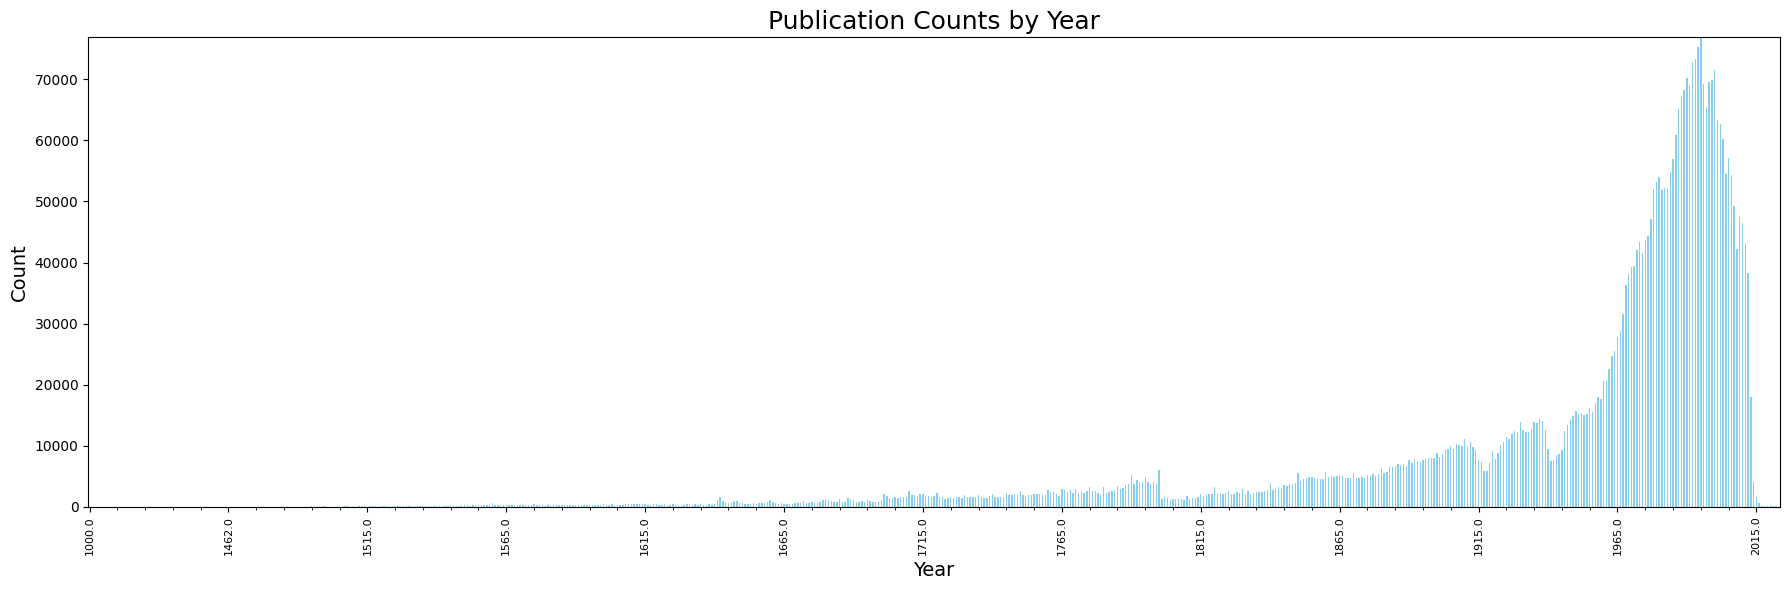

In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Visualize the most common publication years (extracting year from 'Date')
data_cleaned['year'] = data_cleaned['date'].str.extract(r'(\d{4})').astype(float)
# Only show years between 1000 and current year
current_year = int(pd.Timestamp.now().year)
valid_years = data_cleaned['year'].dropna()
valid_years = valid_years[(valid_years >= 1000) & (valid_years <= current_year)]
top_years = valid_years.value_counts().sort_index()
# Show only the first 1600 years if desired
top_years = top_years.head(1600)
# Plot with improved readability
fig, ax = plt.subplots(figsize=(18,6))
top_years.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Publication Counts by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
# Show every 50th year label for clarity
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
# Optionally, limit y-axis for better scaling
ax.set_ylim(0, np.percentile(top_years.values, 99)*1.1)
plt.tight_layout()
plt.show()

In [133]:
# get tbooks published before 1400
pre_1400_books = data_cleaned[data_cleaned['year'] < 1450]
print(f"Number of books published before 1400: {len(pre_1400_books)}")
# order by year
pre_1400_books = pre_1400_books.sort_values(by='year')
print(pre_1400_books[['title', 'year']])

Number of books published before 1400: 59
                                                     title    year
1880708                           The dealer & the devil /   212.0
1787142  The Belmont guide to inland waterways locks an...   976.0
3006539                             Ah! Que c'est bête! /  1000.0
1418864  Spoken in whispers : the autobiography of a ho...  1004.0
2773643              Meaning and the structure of language  1070.0
4056651  Spiritual discourses, on twelve several passag...  1074.0
2649856  Karte der Turkstämme nach d. Kitab diwãn lug...  1074.0
805025                      Heather confessions of a witch  1076.0
4325014  Grammar made easie: containing Despauter's Gra...  1078.0
4195054                        Issues in community service  1080.0
1663237  Vie de Barberousse, générale des armés nava...  1081.0
1205814                       Aristainetou Epistolai ... /  1094.0
2928708  Report of a case of disease guidance notes on ...  1098.0
1290182  Parker's ep

## Saving cleaned data and stats

In [63]:
print(data_cleaned.head())
# save cleaned data to file
with open('../nls-catalogue-published-material/data_cleaned.csv', 'w', encoding='utf-8') as f: 
    data_cleaned.to_csv(f, index=False)  

                                               title  \
0  Anglo-russkii slovar' po mikroelektronike : ok...   
1  Local government finance in Scotland: rate sup...   
2  The correlation of monthly rainfall with posit...   
3                                          Catalogue   
4  Control of pests and diseases of grass and for...   

                                             creator  type  \
0          Prokhorov, K. IA.(Konstantin IAkovlevich)  text   
1                     Great Britain.Scottish Office.  text   
2  Commonwealth Scientific and Industrial Researc...  text   
3                        Peter Deloford (Bookseller)  text   
4                                               None  text   

                                           publisher  date language  \
0                               Moskva Russkii iazyk  1985  Russian   
1                        [Edinburgh] Scottish Office  1985  English   
2  Melbourne : Commonwealth Scientific and Indust...  1958  English   
3     

In [64]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
with open('../nls-catalogue-published-material/data_stats.json', "w") as file: 
    json.dump(data_stats, file, cls=NpEncoder)

data_stats['language']


{'unique_count': 367,
 'value_counts': {'English': 4171764,
  '   ': 345181,
  'French': 125319,
  'German': 108951,
  'Latin': 62185,
  'Undetermined': 47813,
  'Italian': 41031,
  'Russian': 29834,
  'Spanish': 27459,
  'No linguistic content': 21256,
  'Welsh': 16269,
  'Dutch': 9391,
  'Polish': 8158,
  ' ': 7184,
  'Irish': 6936,
  'Swedish': 6344,
  'Danish': 5527,
  'Norwegian': 4962,
  'Portuguese': 4812,
  'Scottish Gaelic': 4761,
  'Greek, Ancient (to 1453)': 3102,
  'Greek, Modern (1453-)': 3048,
  'Multiple languages': 2870,
  'Scots': 2261,
  'Czech': 1800,
  'Arabic': 1745,
  'Chinese': 1725,
  'Catalan': 1179,
  'Romanian': 974,
  'Japanese': 911,
  'Icelandic': 865,
  'Hungarian': 849,
  'Indonesian': 802,
  'Ukrainian': 766,
  'Finnish': 761,
  'Croatian': 725,
  'Breton': 689,
  'Hebrew': 658,
  'Persian': 502,
  'Turkish': 500,
  'Bulgarian': 465,
  'Serbian': 371,
  'Afrikaans': 344,
  'Slovak': 343,
  'Urdu': 310,
  '|||': 299,
  'Swahili': 274,
  'Esperanto': 250,

In [65]:
with open('../nls-catalogue-published-material/norm_log.json', "w") as file: 
        json.dump(norm_log, file)

norm_log



{'title': ['Trimmed whitespace from 43157 values',
  'Normalized multiple spaces in 57905 values',
  'Found 248 values with garbage/control characters',
  'Found 43848 values with suspicious patterns'],
 'creator': ['Trimmed whitespace from 34 values',
  'Normalized multiple spaces in 5229 values',
  'Found 84 values with garbage/control characters',
  'Found 960 values with suspicious patterns'],
 'type': ['Trimmed whitespace from 835 values',
  'Normalized multiple spaces in 1 values',
  'Found 13 values with suspicious patterns'],
 'publisher': ['Trimmed whitespace from 843148 values',
  'Normalized multiple spaces in 106461 values',
  'Found 42 values with garbage/control characters',
  'Found 2444 values with suspicious patterns'],
 'date': ['Extracted year from 63116 unique date formats'],
 'language': ['Found 352809 values with non-standard language codes',
  'Mapped 5091427 language codes to full names'],
 'subject': ['Trimmed whitespace from 11 values',
  'Normalized multiple 